---
# Count triplet frequencies in Human genome HG38
---

- To estimate the relative mutation rate of each triplet 
  we need to know how many of each triplet exist in the 
  human genome
  
- We simply walk through the genome counting each unique
  triplet.
  
- Triplets will include those with N's and lower case letters

        - We ignore those with N's and convert the lower case to upper



In [1]:
import json
from Bio import SeqIO
import gzip 
from collections import defaultdict

In [2]:

trips = defaultdict(int)

In [4]:
trips

defaultdict(int, {})

In [ ]:


trips = defaultdict(int)

ref = gzip.open("/scratch/research/references/hsapiens/hg38/hg38.fa.gz", 'rt')

for s in SeqIO.parse(ref, 'fasta'):
    for i in range(len(s.seq)-3):
        triplet = str(s.seq[i:i+3])
        trips[triplet]+=1
            
    

In [15]:
from itertools import product

# this deals with ignoring triplets with Ns and uppercases all the triplets with lower case ba
trip_data = dict(zip(["".join(t) for t in product("ACGT", repeat=3) ], [0]*64))
for triplet, t_count in trips.items():
    if triplet.upper() in trip_data:
        trip_data[triplet.upper()] += t_count

triplets = list(trip_data.keys())
triplets.sort()
for t in triplets:
    print(t,":\t", trip_data[t])
        

AAA :	 116219865
AAC :	 45054039
AAG :	 60506716
AAT :	 74983114
ACA :	 61496684
ACC :	 35209715
ACG :	 7954793
ACT :	 49169423
AGA :	 67980623
AGC :	 42741732
AGG :	 53953871
AGT :	 49109578
ATA :	 62191925
ATC :	 40532560
ATG :	 55516564
ATT :	 75663351
CAA :	 57170968
CAC :	 45873394
CAG :	 62322498
CAT :	 55814087
CCA :	 55568638
CCC :	 39882676
CCG :	 8495526
CCT :	 54101070
CGA :	 6847361
CGC :	 7416430
CGG :	 8705912
CGT :	 8010016
CTA :	 38950865
CTC :	 51615280
CTG :	 61556952
CTT :	 61394655
GAA :	 61143571
GAC :	 28896461
GAG :	 51713795
GAT :	 41018890
GCA :	 44177624
GCC :	 36081859
GCG :	 7479830
GCT :	 42326258
GGA :	 48024396
GGC :	 36067367
GGG :	 40000766
GGT :	 35209635
GTA :	 34395292
GTC :	 28621456
GTG :	 46474021
GTT :	 44703218
TAA :	 62229283
TAC :	 34006723
TAG :	 39242680
TAT :	 62088324
TCA :	 59937972
TCC :	 46873740
TCG :	 7049574
TCT :	 67921009
TGA :	 59920239
TGC :	 43840071
TGG :	 56641534
TGT :	 61864773
TTA :	 62028934
TTC :	 61013121
TTG :	 58719052

** copying the above into a string, convertoing to dictionary, saving ** 

In [3]:
TripletCountString = "AAA :	 116219865 AAC :	 45054039 AAG :	 60506716 AAT :	 74983114 ACA :	 61496684 ACC :	 35209715 ACG :	 7954793 ACT :	 49169423 AGA :	 67980623 AGC :	 42741732 AGG :	 53953871 AGT :	 49109578 ATA :	 62191925 ATC :	 40532560 ATG :	 55516564 ATT :	 75663351 CAA :	 57170968 CAC :	 45873394 CAG :	 62322498 CAT :	 55814087 CCA :	 55568638 CCC :	 39882676 CCG :	 8495526 CCT :	 54101070 CGA :	 6847361 CGC :	 7416430  CGG :	 8705912 CGT :	 8010016 CTA :	 38950865 CTC :	 51615280 CTG :	 61556952 CTT :	 61394655 GAA :	 61143571 GAC :	 28896461 GAG :	 51713795 GAT :	 41018890 GCA :	 44177624 GCC :	 36081859 GCG :	 7479830 GCT :	 42326258 GGA :	 48024396 GGC :	 36067367 GGG :	 40000766 GGT :	 35209635 GTA :	 34395292 GTC :	 28621456 GTG :	 46474021 GTT :	 44703218 TAA :	 62229283 TAC :	 34006723 TAG :	 39242680 TAT :	 62088324 TCA :	 59937972 TCC :	 46873740 TCG :	 7049574 TCT :	 67921009 TGA :	 59920239 TGC :	 43840071 TGG :	 56641534 TGT :	 61864773 TTA :	 62028934 TTC :	 61013121 TTG :	 58719052  TTT :	 117589720"


In [6]:
rob_string_split = TripletCountString.split()
rob_string_split = list(filter(lambda x: x != ":", rob_string_split))
print(rob_string_split[0:10])

['AAA', '116219865', 'AAC', '45054039', 'AAG', '60506716', 'AAT', '74983114', 'ACA', '61496684']


In [7]:
triplet_counts_dict = {}
for i in range(0,len(rob_string_split),2): 
    triplet = rob_string_split[i]
    count = rob_string_split[i+1]
    triplet_counts_dict[triplet] = count

In [8]:
with open('GenomeTripletCounts_2020_12_02_genomeWide.txt', 'w') as outfile:
    json.dump(triplet_counts_dict, outfile)

# ** ANanlyzing the genome triplet freqs ** 

In [37]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

In [1]:
RobString = "AAA :	 116219865 AAC :	 45054039 AAG :	 60506716 AAT :	 74983114 ACA :	 61496684 ACC :	 35209715 ACG :	 7954793 ACT :	 49169423 AGA :	 67980623 AGC :	 42741732 AGG :	 53953871 AGT :	 49109578 ATA :	 62191925 ATC :	 40532560 ATG :	 55516564 ATT :	 75663351 CAA :	 57170968 CAC :	 45873394 CAG :	 62322498 CAT :	 55814087 CCA :	 55568638 CCC :	 39882676 CCG :	 8495526 CCT :	 54101070 CGA :	 6847361 CGC :	 7416430  CGG :	 8705912 CGT :	 8010016 CTA :	 38950865 CTC :	 51615280 CTG :	 61556952 CTT :	 61394655 GAA :	 61143571 GAC :	 28896461 GAG :	 51713795 GAT :	 41018890 GCA :	 44177624 GCC :	 36081859 GCG :	 7479830 GCT :	 42326258 GGA :	 48024396 GGC :	 36067367 GGG :	 40000766 GGT :	 35209635 GTA :	 34395292 GTC :	 28621456 GTG :	 46474021 GTT :	 44703218 TAA :	 62229283 TAC :	 34006723 TAG :	 39242680 TAT :	 62088324 TCA :	 59937972 TCC :	 46873740 TCG :	 7049574 TCT :	 67921009 TGA :	 59920239 TGC :	 43840071 TGG :	 56641534 TGT :	 61864773 TTA :	 62028934 TTC :	 61013121 TTG :	 58719052  TTT :	 117589720"


In [25]:
triplet_counts_dict["ACA"]

'61496684'

In [26]:
model = {'GTC': [0.38170347003154576, {'GCC': 0.581267217630854, 'GGC': 0.17447199265381083, 'GAC': 0.24426078971533516}], 'TGA': [0.44338655339094774, {'TAA': 0.6247109349190618, 'TTA': 0.12685827552031714, 'TCA': 0.2484307895606211}], 'TAT': [0.544423228125351, {'TTT': 0.12131215184650299, 'TGT': 0.8021456571074892, 'TCT': 0.07654219104600785}], 'CGC': [0.9428571428571428, {'CTC': 0.06703397612488522, 'CCC': 0.027548209366391185, 'CAC': 0.9054178145087236}], 'ATT': [0.48758198043221157, {'AGT': 0.1133406835722161, 'ACT': 0.7592061742006616, 'AAT': 0.1274531422271224}], 'GCA': [0.49819102749638206, {'GTA': 0.6016702977487292, 'GAA': 0.24473493100944083, 'GGA': 0.15359477124183007}], 'CGT': [0.9583888149134487, {'CTT': 0.04341785342132685, 'CCT': 0.03403959708232025, 'CAT': 0.922542549496353}], 'CCA': [0.4589957500393515, {'CTA': 0.6903292181069959, 'CGA': 0.20781893004115226, 'CAA': 0.10185185185185185}], 'GGA': [0.5196784458214705, {'GTA': 0.17015791169835642, 'GAA': 0.602964872703835, 'GCA': 0.22687721559780857}], 'AAA': [0.3198252625708709, {'ACA': 0.2961348445219413, 'ATA': 0.17988956698634118, 'AGA': 0.5239755884917175}], 'AAC': [0.3978541712283775, {'ACC': 0.17776554760594387, 'AGC': 0.6692350027517887, 'ATC': 0.15299944964226747}], 'CTC': [0.3202682875707399, {'CGC': 0.21662303664921467, 'CCC': 0.5530104712041884, 'CAC': 0.23036649214659685}], 'AGG': [0.5123493090267568, {'ACG': 0.22955523672883785, 'AAG': 0.6662840746054519, 'ATG': 0.10416068866571017}], 'AGA': [0.4717741935483871, {'ACA': 0.34816490698843644, 'AAA': 0.47611865258924085, 'ATA': 0.1757164404223228}], 'AGC': [0.5081906865451868, {'ACC': 0.20101412531691415, 'AAC': 0.6356392611372691, 'ATC': 0.16334661354581673}], 'CAA': [0.36173285198555954, {'CTA': 0.13822355289421157, 'CGA': 0.5768463073852296, 'CCA': 0.28493013972055886}], 'CTT': [0.35645079041305455, {'CGT': 0.2341440152598951, 'CCT': 0.6132570338578922, 'CAT': 0.15259895088221268}], 'CAC': [0.3995351785336996, {'CCC': 0.20359598096245374, 'CTC': 0.18244315177154943, 'CGC': 0.6139608672659969}], 'TAG': [0.38808618504435993, {'TCG': 0.16525146962769433, 'TGG': 0.6962769431743958, 'TTG': 0.13847158719790986}], 'ACA': [0.5516478655164787, {'ATA': 0.6555733761026463, 'AGA': 0.17802726543704891, 'AAA': 0.16639935846030474}], 'CTG': [0.4073735527117611, {'CGG': 0.20905011219147346, 'CAG': 0.1480927449513837, 'CCG': 0.6428571428571429}], 'ACT': [0.5261127596439169, {'AGT': 0.24844895657078397, 'ATT': 0.5964467005076142, 'AAT': 0.1551043429216018}], 'TTA': [0.3860215053763441, {'TGA': 0.20533227218463987, 'TAA': 0.22682053322721846, 'TCA': 0.5678471945881417}], 'CGA': [0.9197916666666667, {'CTA': 0.026896942242355604, 'CAA': 0.9210079275198187, 'CCA': 0.052095130237825596}], 'GTA': [0.4143262045864468, {'GGA': 0.12686567164179105, 'GAA': 0.1455223880597015, 'GCA': 0.7276119402985075}], 'GGC': [0.5527913809990206, {'GCC': 0.1630049610205528, 'GTC': 0.23848334514528702, 'GAC': 0.5985116938341601}], 'AGT': [0.5261127596439169, {'ATT': 0.1551043429216018, 'ACT': 0.24844895657078397, 'AAT': 0.5964467005076142}], 'AAT': [0.48758198043221157, {'AGT': 0.7592061742006616, 'ATT': 0.1274531422271224, 'ACT': 0.1133406835722161}], 'CCG': [0.943577893317928, {'CTG': 0.943265306122449, 'CGG': 0.04673469387755102, 'CAG': 0.01}], 'ACC': [0.6345660930062248, {'AAC': 0.3147720715522216, 'ATC': 0.532602423542989, 'AGC': 0.15262550490478938}], 'TCC': [0.5196784458214705, {'TTC': 0.602964872703835, 'TGC': 0.22687721559780857, 'TAC': 0.17015791169835642}], 'TCT': [0.4717741935483871, {'TTT': 0.47611865258924085, 'TGT': 0.34816490698843644, 'TAT': 0.1757164404223228}], 'CAG': [0.4073735527117611, {'CTG': 0.1480927449513837, 'CGG': 0.6428571428571429, 'CCG': 0.20905011219147346}], 'TTG': [0.36173285198555954, {'TCG': 0.5768463073852296, 'TGG': 0.28493013972055886, 'TAG': 0.13822355289421157}], 'ATC': [0.4466903598400711, {'ACC': 0.5862754848334162, 'AAC': 0.2973644952759821, 'AGC': 0.11636001989060167}], 'CGG': [0.943577893317928, {'CTG': 0.01, 'CAG': 0.943265306122449, 'CCG': 0.04673469387755102}], 'TTC': [0.30323054331864907, {'TGC': 0.2391041162227603, 'TCC': 0.5617433414043583, 'TAC': 0.19915254237288135}], 'TAA': [0.3860215053763441, {'TGA': 0.5678471945881417, 'TTA': 0.22682053322721846, 'TCA': 0.20533227218463987}], 'ATG': [0.5741935483870968, {'ACG': 0.716724286949006, 'AAG': 0.1497407087294728, 'AGG': 0.13353500432152118}], 'GGT': [0.6345660930062248, {'GTT': 0.3147720715522216, 'GCT': 0.15262550490478938, 'GAT': 0.532602423542989}], 'TGC': [0.49819102749638206, {'TTC': 0.24473493100944083, 'TCC': 0.15359477124183007, 'TAC': 0.6016702977487292}], 'GTG': [0.3995351785336996, {'GAG': 0.18244315177154943, 'GCG': 0.6139608672659969, 'GGG': 0.20359598096245374}], 'GGG': [0.5453669813138123, {'GAG': 0.6450017661603674, 'GTG': 0.11974567290709998, 'GCG': 0.2352525609325327}], 'ACG': [0.9583888149134487, {'ATG': 0.922542549496353, 'AAG': 0.04341785342132685, 'AGG': 0.03403959708232025}], 'TGG': [0.4589957500393515, {'TCG': 0.20781893004115226, 'TTG': 0.10185185185185185, 'TAG': 0.6903292181069959}], 'GAA': [0.30323054331864907, {'GTA': 0.19915254237288135, 'GGA': 0.5617433414043583, 'GCA': 0.2391041162227603}], 'GAC': [0.38170347003154576, {'GCC': 0.17447199265381083, 'GTC': 0.24426078971533516, 'GGC': 0.581267217630854}], 'TAC': [0.4143262045864468, {'TTC': 0.1455223880597015, 'TGC': 0.7276119402985075, 'TCC': 0.12686567164179105}], 'GAT': [0.4466903598400711, {'GTT': 0.2973644952759821, 'GCT': 0.11636001989060167, 'GGT': 0.5862754848334162}], 'ATA': [0.544423228125351, {'ACA': 0.8021456571074892, 'AAA': 0.12131215184650299, 'AGA': 0.07654219104600785}], 'GCT': [0.5081906865451868, {'GTT': 0.6356392611372691, 'GGT': 0.20101412531691415, 'GAT': 0.16334661354581673}], 'CAT': [0.5741935483870968, {'CTT': 0.1497407087294728, 'CGT': 0.716724286949006, 'CCT': 0.13353500432152118}], 'CTA': [0.38808618504435993, {'CGA': 0.16525146962769433, 'CAA': 0.13847158719790986, 'CCA': 0.6962769431743958}], 'CCT': [0.5123493090267568, {'CTT': 0.6662840746054519, 'CGT': 0.22955523672883785, 'CAT': 0.10416068866571017}], 'TTT': [0.3198252625708709, {'TCT': 0.5239755884917175, 'TGT': 0.2961348445219413, 'TAT': 0.17988956698634118}], 'TCG': [0.9197916666666667, {'TGG': 0.052095130237825596, 'TTG': 0.9210079275198187, 'TAG': 0.026896942242355604}], 'AAG': [0.35645079041305455, {'ATG': 0.15259895088221268, 'ACG': 0.2341440152598951, 'AGG': 0.6132570338578922}], 'GTT': [0.3978541712283775, {'GCT': 0.6692350027517887, 'GGT': 0.17776554760594387, 'GAT': 0.15299944964226747}], 'TCA': [0.44338655339094774, {'TAA': 0.12685827552031714, 'TGA': 0.2484307895606211, 'TTA': 0.6247109349190618}], 'CCC': [0.5453669813138123, {'CTC': 0.6450017661603674, 'CGC': 0.2352525609325327, 'CAC': 0.11974567290709998}], 'GAG': [0.3202682875707399, {'GTG': 0.23036649214659685, 'GCG': 0.21662303664921467, 'GGG': 0.5530104712041884}], 'GCG': [0.9428571428571428, {'GAG': 0.06703397612488522, 'GTG': 0.9054178145087236, 'GGG': 0.027548209366391185}], 'GCC': [0.5527913809990206, {'GTC': 0.5985116938341601, 'GGC': 0.1630049610205528, 'GAC': 0.23848334514528702}], 'TGT': [0.5516478655164787, {'TCT': 0.17802726543704891, 'TAT': 0.6555733761026463, 'TTT': 0.16639935846030474}]}

In [40]:
triplets = []
counts = []
mut = []

for triplet_key, count_value in triplet_counts_dict.items(): 
    triplets.append(triplet_key)
    counts.append(int(count_value))
    mut.append(model[triplet_key][0])

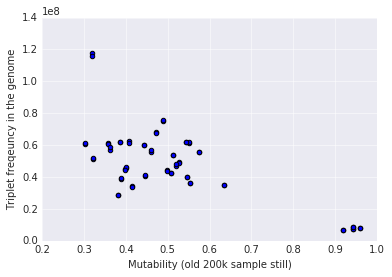

In [44]:
plt.scatter(mut, counts)
plt.xlabel("Mutability (old 200k sample still)")
plt.ylabel("Triplet freqeuncy in the genome")
#plt.title("Change in Triplet Count \n"+sim_details)
plt.savefig("GenometripletCouts_vs_OldsampledMutability")

In [ ]:
aaaaaaaaaaaa